<a href="https://colab.research.google.com/github/japashira/sprint3_ia/blob/main/Challenge_IA_SPRINT3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sprint 3 - DentalCare**

Projeto de Machine Learning para Redução de Sinistros Odontológicos


## 🔹 1: Configuração do Ambiente


In [17]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [18]:
# Configuração de estilo dos gráficos
sns.set_style('whitegrid')

## 🔹 2: Carregar e Preparar os Dados

In [19]:
# Gerar dados sintéticos simulando histórico odontológico
num_samples = 1000
np.random.seed(42)

dados = {
    'idade': np.random.randint(18, 70, num_samples),
    'frequencia_consultas': np.random.randint(1, 10, num_samples),
    'procedimento_preventivo': np.random.choice([0, 1], num_samples),
    'historico_doenca': np.random.choice([0, 1], num_samples),
    'tempo_ultima_consulta': np.random.randint(1, 12, num_samples),
    'consulta_desnecessaria': np.random.choice([0, 1], num_samples)
}
df = pd.DataFrame(dados)

# Exibir primeiras linhas do dataset
df.head()

,idade,frequencia_consultas,procedimento_preventivo,historico_doenca,tempo_ultima_consulta,consulta_desnecessaria
0,56,3,0,0,1,0
1,69,3,1,0,1,1
2,46,9,1,1,1,0
3,32,7,0,1,1,0
4,60,5,0,0,8,0


## 🔹 3: Justificativa do Modelo de IA


O modelo Random Forest foi escolhido devido à sua capacidade de lidar com dados tabulares,resistência a overfitting e interpretabilidade. Ele é ideal para prever padrões de comportamento odontológico com base em múltiplos fatores. Além disso, sua capacidade de medir a importância das variáveis auxilia na explicação das previsões.

## 🔹 4: Pré-Processamento dos Dados


In [21]:
# Verificar valores nulos
df.isnull().sum()

# Normalização dos dados
scaler = StandardScaler()
X = df.drop('consulta_desnecessaria', axis=1)
y = df['consulta_desnecessaria']
X_scaled = scaler.fit_transform(X)

## 🔹 5: Divisão dos Dados


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"Conjunto de Treinamento: {X_train.shape}")
print(f"Conjunto de Teste: {X_test.shape}")

Conjunto de Treinamento: (800, 5)
Conjunto de Teste: (200, 5)


## 🔹 6: Treinamento do Modelo com Validação Cruzada


In [23]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Acurácia Média da Validação Cruzada: {scores.mean():.4f}")

rf_model.fit(X_train, y_train)

Acurácia Média da Validação Cruzada: 0.5050


RandomForestClassifier(random_state=42)

## 🔹 7: Avaliação do Modelo

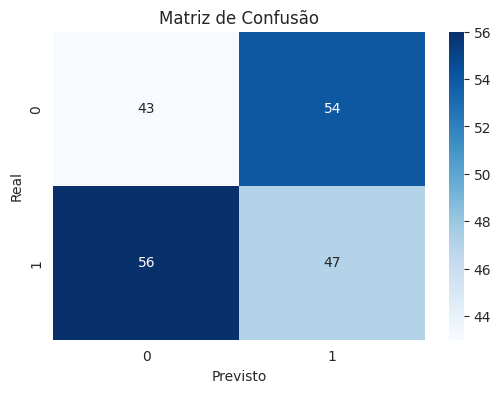

              precision    recall  f1-score   support

           0       0.43      0.44      0.44        97
           1       0.47      0.46      0.46       103

    accuracy                           0.45       200
   macro avg       0.45      0.45      0.45       200
weighted avg       0.45      0.45      0.45       200



In [24]:
# Predições
y_pred = rf_model.predict(X_test)

# Matriz de Confusão
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Relatório de Classificação
print(classification_report(y_test, y_pred))


## 🔹 8: Interpretação do Modelo


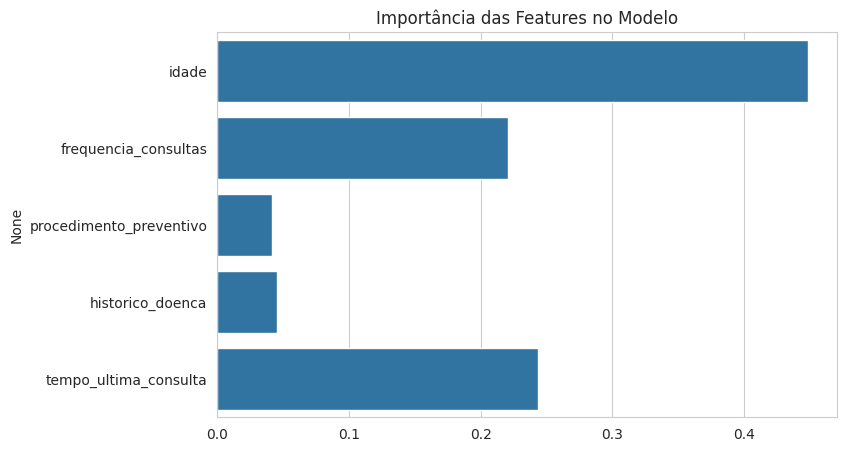

In [25]:
# Importância das Features
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=features)
plt.title('Importância das Features no Modelo')
plt.show()

## 🔹 9: Integração com Outras Disciplinas
O modelo de IA será integrado ao backend via API REST utilizando Flask ou FastAPI. Ele poderá ser consumido pelo sistema principal (desenvolvido em .NET ou Java) e pelo aplicativo móvel para fornecer previsões em tempo real.

## 🔹 10: Exportar Modelo Treinado


In [26]:
import joblib
joblib.dump(rf_model, "modelo_rf.pkl")
print("Modelo salvo com sucesso!")


Modelo salvo com sucesso!


## 🔹 11: Análise de Problemas e Melhorias
# Problemas encontrados na Sprint 2:
- Falta de normalização dos dados
- Modelo treinado sem validação cruzada
- Falta de explicação sobre a importância das variáveis

## Melhorias implementadas na Sprint 3:

✅ Normalização com StandardScaler

✅ Implementação de validação cruzada

✅ Gráfico de importância das features

## Próximos passos para a Sprint 4:
1. Testar outros algoritmos de Machine Learning
2. Implementar otimização de hiperparâmetros
3. Criar uma API para integrar o modelo à aplicação

## 🔹 12: Criatividade e Apresentação
# Para a entrega final, um vídeo demonstrativo será gravado mostrando:
1. A execução do notebook
2. As melhorias feitas
3. Como o modelo será integrado ao sistema principal
4. A importância dos resultados obtidos